In [1]:
%reset
from ROOT import *
from math import *
#----------------------------------------------------------------------------------- #
#
#  Python/ROOT macro for illustrating the Binomial, Poisson and Gaussian distributions.
#
#  Reference:
#    Barlow 
#
#  Run this pyROOT macro by:
#    > ./BinomialPoissonGaussian.py
#
#  Author: Troels C. Petersen (NBI)
#  Email:  petersen@nbi.dk
#  Date:   7th of September 2014
#
# ----------------------------------------------------------------------------------- #

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Welcome to JupyROOT 6.12/06


/opt/root/lib/ROOT.py:434: UserWarning: "from ROOT import *" is not supported under IPython
  warnings.warn( '"from ROOT import *" is not supported under IPython' )


# TRandomGenerator
Declare the random generator.

Define process, i.e. number of trials and probability of success:

In [2]:
r = TRandom3()                        # Random generator
r.SetSeed(1)

SavePlots = False
verbose = True
Nverbose = 5

##########################
Nexperiments = 1000
Ntrials = 10
pSuccess = 1.0/6.0
#########################

Lambda = Ntrials * pSuccess     # This is the mean and also how the Poisson parameter is defined!

Hist_nSuccess = TH1F("Hist_nSuccess", ";Number of successes;Frequency", Ntrials+1, -0.5, Ntrials+0.5)

for iexp in range( Nexperiments ) : 
    
    # Simulating process defined:
    nSuccess = 0
    for i in range( Ntrials ) : 
        x = r.Uniform()
        if (x < pSuccess) : nSuccess = nSuccess + 1

    # Record result:
    if (verbose and iexp < Nverbose) : print "  nSuccess: %4d"%(nSuccess)
    Hist_nSuccess.Fill(nSuccess)

  nSuccess:    3
  nSuccess:    1
  nSuccess:    1
  nSuccess:    1
  nSuccess:    1


# Plot result

Plot the data points.

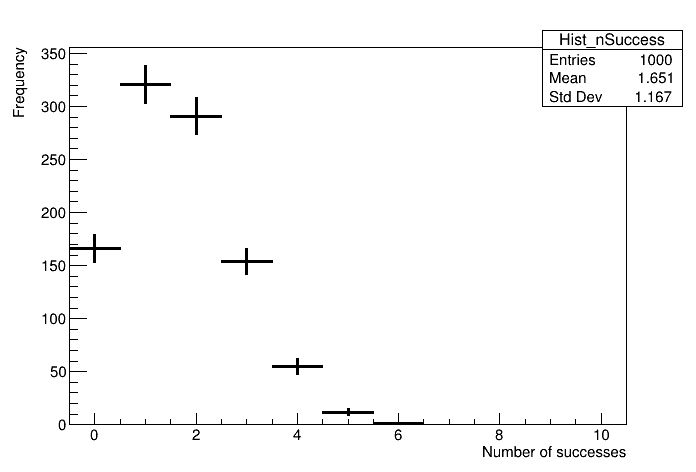

In [3]:
canvas = TCanvas( "canvas", "", 50, 50, 1200, 600 )

# canvas.SetLogy()          # Set the y-axis to be logarithmic
c = TCanvas()
# Draw the histogram:
# Hist_nSuccess.GetXaxis().SetRangeUser(-0.5, 10.5)
Hist_nSuccess.SetLineWidth(3)
Hist_nSuccess.SetLineColor(kBlack)
canvas.cd()
Hist_nSuccess.Draw("e")
c.cd()
Hist_nSuccess.Draw("e")
c.Draw()

## PDF: Binomial Distribution

$P(x;n) = \frac{n!}{x!(n-1)!} p^{x}(1-p)^{n-x}$

It is applicable to discrete random variable with two outcome.

p = probability for success

x = random variable

n = number of trial

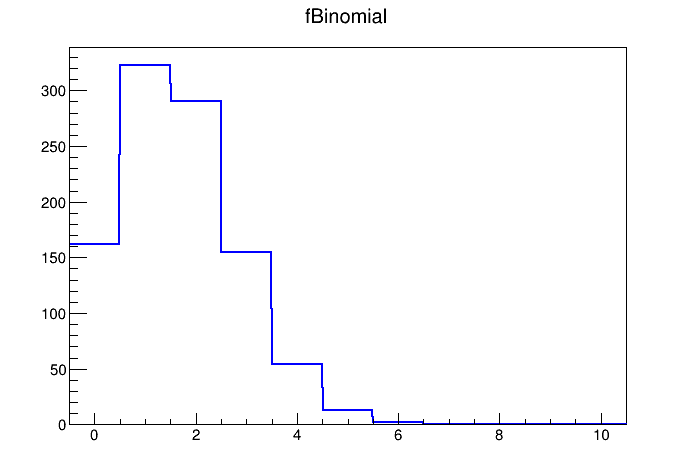

In [4]:
def func_Binomial(x, p) :
    if (x[0] > -0.5) :
        return p[0] * TMath.Binomial(int(p[1]), int(x[0]+0.5)) * TMath.Power(p[2],int(x[0]+0.5)) * TMath.Power(1-p[2], int(p[1])-int(x[0]+0.5))
    else : return 0.0
c1 = TCanvas()
fBinomial = TF1("fBinomial", func_Binomial, -0.5, Ntrials+0.5, 3)
fBinomial.SetParameters(Nexperiments, Ntrials, pSuccess)
fBinomial.SetNpx(1000)        # Set the number of intervals used when drawing function!
fBinomial.SetLineColor(kBlue)
canvas.cd()
fBinomial.Draw("same")

c1.cd()
fBinomial.Draw()
c1.Draw()

## PDF: Poisson Distribution

$P(n; \nu) = \frac{\nu^{n}e^{-\nu}}{n!}$

$\nu$ = average, pn, where p = probability of success (< 0.05)

n = number of trail



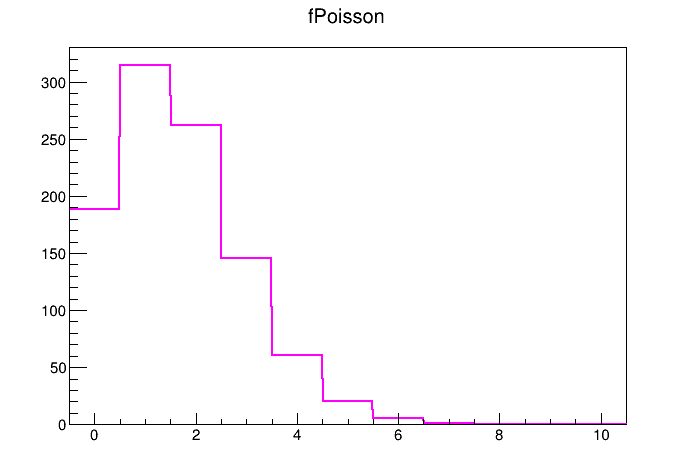

In [5]:
def func_Poisson(x, p) :
    if (x[0] > -0.5) :
        return p[0] * TMath.PoissonI(x[0]+0.5, p[1])
    else : return 0.0
c2 = TCanvas()
fPoisson = TF1("fPoisson", func_Poisson, -0.5, Ntrials+0.5, 2)
fPoisson.SetParameters(Nexperiments, Lambda)
fPoisson.SetNpx(1000)        # Set the number of intervals used when drawing function!
fPoisson.SetLineColor(kMagenta)
canvas.cd()
fPoisson.Draw("same")
c2.cd()
fPoisson.Draw()
c2.Draw()

# PDF: Gaussian Distribution

$P(x; \mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^{2}}} exp^{(-\frac{(x-\mu)^{2}}{2\sigma^{2}})}$

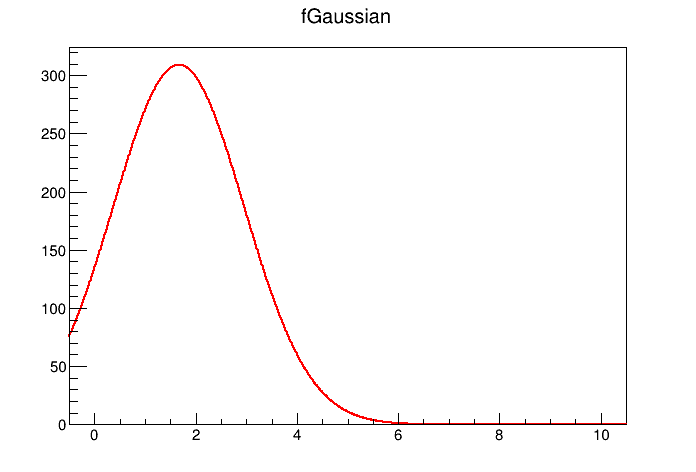

In [6]:
def func_Gaussian(x, p) :
    z = ((x[0]) - p[1]) / p[2]
    return p[0] / sqrt(2*TMath.Pi()) / p[2] * exp(-0.5 *z*z)
c3 = TCanvas()
fGaussian = TF1("fGaussian", func_Gaussian, -0.5, Ntrials+0.5, 3)
fGaussian.SetParameters(Nexperiments, Lambda, sqrt(Lambda))
fGaussian.SetNpx(1000)        # Set the number of intervals used when drawing function!
fGaussian.SetLineColor(kRed)
canvas.cd()
fGaussian.Draw("same")
c3.cd()
fGaussian.Draw()
c3.Draw()

Press Enter to exity


'y'

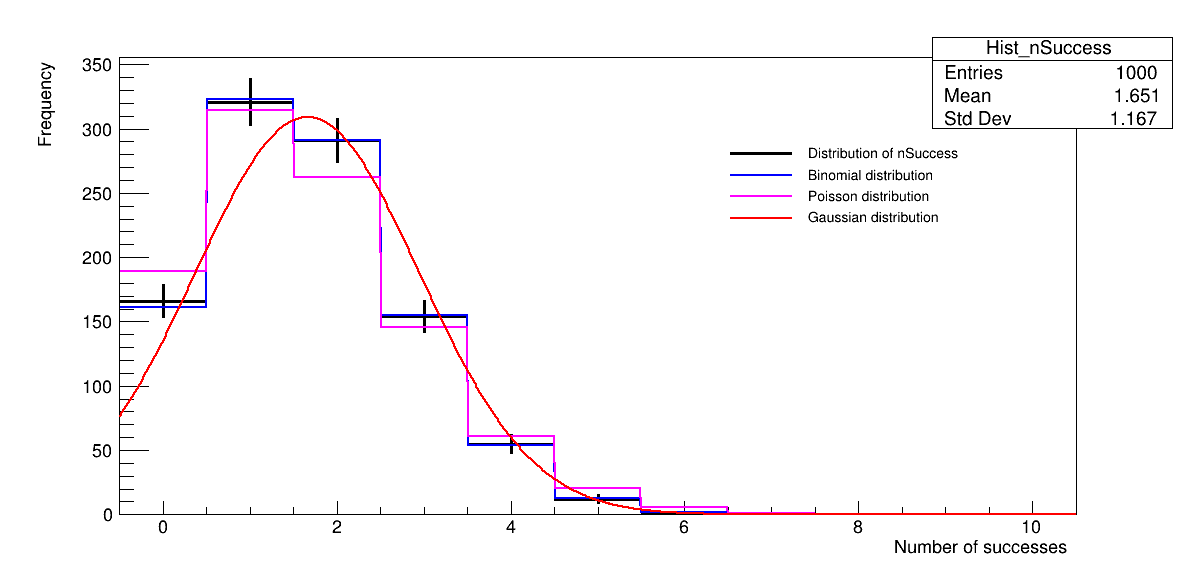

In [7]:
canvas.cd()
leg = TLegend( 0.60, 0.60, 0.89, 0.75 )
leg.SetFillColor(kWhite)
leg.SetLineColor(kWhite)
leg.AddEntry(Hist_nSuccess, " Distribution of nSuccess", "L")
leg.AddEntry(fBinomial, " Binomial distribution", "L")
leg.AddEntry(fPoisson,  " Poisson distribution", "L")
leg.AddEntry(fGaussian, " Gaussian distribution", "L")
leg.Draw()
canvas.Draw()
if (SavePlots) : canvas.SaveAs("BinomialPoissonGaussian.pdf")


#raw_input('Press Enter to exit')